In [1]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division



def opWindow(img,x,y,current,maximum):
    N, M = img.shape
    win_offset = current / 2
    #print int(win_offset)*2 +1
    xleft = x - win_offset
    
    xright = x + win_offset
    if xleft < 0:
        xleft = 0
    if xright >= N:
        xright = N - 1
    
    yup = y - win_offset
    ydown = y + win_offset
    if yup < 0:
        yup = 0
    if ydown >= M:
        ydown = M - 1
            
            
    window = img[int(xleft):int(xright), int(yup):int(ydown)] 
    #print window.shape
    #Level A
    zmed=window.mean()
    zmin=window.min()
    zmax=window.max()
        
    a1=zmed - zmin
    a2=zmed - zmax
    if(a1>0 and a2<0):
        b1=img[x,y] - zmin
        b2=img[x,y] - zmax
        if(b1>0 and b2<0):
            return img[x,y]
        else:
            return zmed
    else:
        current=current+1
        
    if(current<=maximum):
        return opWindow(img,x,y,current,maximum)
    else:
        
        return img[x,y]
        
        


def adaptative(img, current=2,maximum=3):

    img_filtered = np.zeros_like(img)
    N, M = img.shape

    for i in xrange(0, N):
        for j in xrange(0, M):
            img_filtered[i, j] =opWindow(img,i,j,current,maximum)


    return img_filtered
img = cv2.imread('Ej/ex.png',0)
print "Listo"

Listo


C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:42: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0xa8d74a8>,
 <matplotlib.text.Text at 0xaa5ed30>)

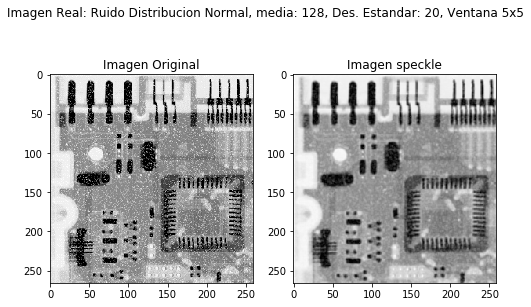

In [2]:
hola=adaptative(img,3,15)
plt.figure(1,figsize=(8,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(hola, cmap=plt.cm.gray), plt.title('Imagen speckle')

In [2]:
from scipy.signal import gaussian, convolve2d

def blur(img, mode='box', block_size=3):
    
    dummy=np.copy(img)
    if mode=='box':
        kernel=np.ones((block_size,block_size))/block_size**2
    elif mode== 'gauss':
        kernel=gaussian(block_size,block_size/3).reshape(block_size,1)
        kernel=np.dot(kernel,kernel.transpose())
        kernel /= np.sum(kernel)
    elif mode=='motion':
        kernel=np.eye(block_size)/ block_size
    dummy =convolve2d(dummy,kernel,mode='same')
    return dummy,kernel

[[ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]]
[[ 0.0178422   0.03061734  0.03665562  0.03061734  0.0178422 ]
 [ 0.03061734  0.05253957  0.06290129  0.05253957  0.03061734]
 [ 0.03665562  0.06290129  0.07530652  0.06290129  0.03665562]
 [ 0.03061734  0.05253957  0.06290129  0.05253957  0.03061734]
 [ 0.0178422   0.03061734  0.03665562  0.03061734  0.0178422 ]]
[[ 0.2  0.   0.   0.   0. ]
 [ 0.   0.2  0.   0.   0. ]
 [ 0.   0.   0.2  0.   0. ]
 [ 0.   0.   0.   0.2  0. ]
 [ 0.   0.   0.   0.   0.2]]


(<matplotlib.axes._subplots.AxesSubplot at 0x1d3c2470>,
 <matplotlib.text.Text at 0x1d896fd0>)

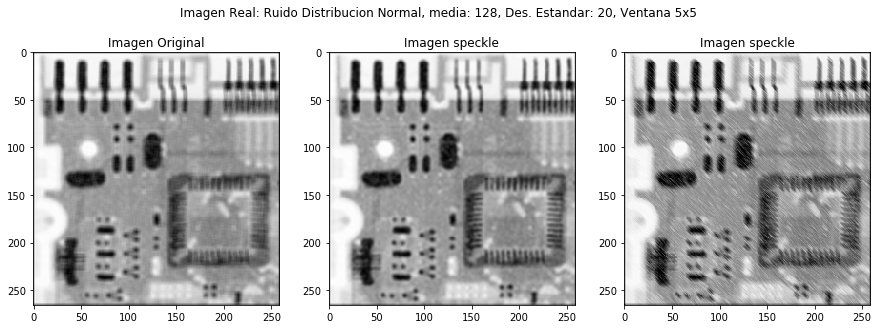

In [6]:

h1,f1=blur(img,'box',5)
h2,f2=blur(img,'gauss',5)
h3,f3=blur(img,'motion',5)
print f1
print f2
print f3
plt.figure(1,figsize=(15,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')
plt.subplot(131), plt.imshow(h1, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(h2, cmap=plt.cm.gray), plt.title('Imagen speckle')
plt.subplot(133), plt.imshow(h3, cmap=plt.cm.gray), plt.title('Imagen speckle')

In [37]:
def notch_gauss(shape,filt,pxd=1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    radius1 = np.sqrt(((x+rows/4)**2)[np.newaxis] + ((y+cols/4)**2)[:,np.newaxis])
    radius2 = np.sqrt(((x-rows/4)**2)[np.newaxis] + ((y-cols/4)**2)[:,np.newaxis])
    
    pot=-0.5*(radius1*radius2)/(filt**2)
    f=np.exp(pot)
    return f
def notch_ideal(shape, f , pxd = 1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    radius1 = np.sqrt(((x+rows/4)**2)[np.newaxis] + ((y+cols/4)**2)[:,np.newaxis])
    radius2 = np.sqrt(((x-rows/4)**2)[np.newaxis] + ((y-cols/4)**2)[:,np.newaxis])
    filt = np.zeros(shape)
    filt[radius1 <= f] = 1
    filt[radius2 <= f] = 1
    return filt



C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log


(<matplotlib.axes._subplots.AxesSubplot at 0x653c0e10>,
 <matplotlib.text.Text at 0x63ecfa58>)

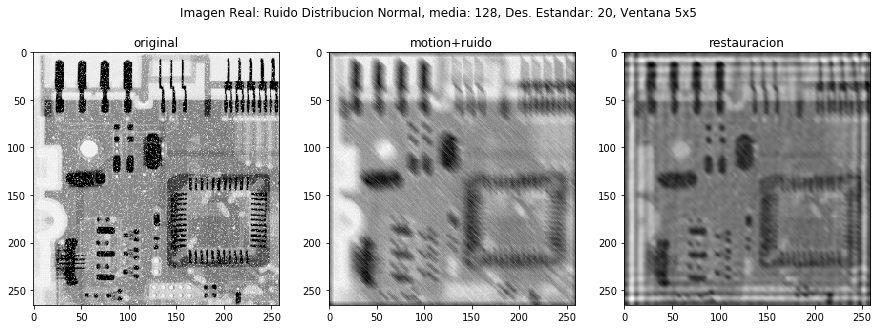

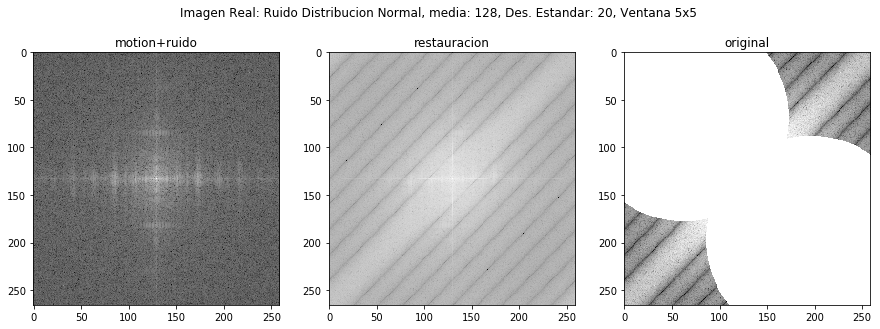

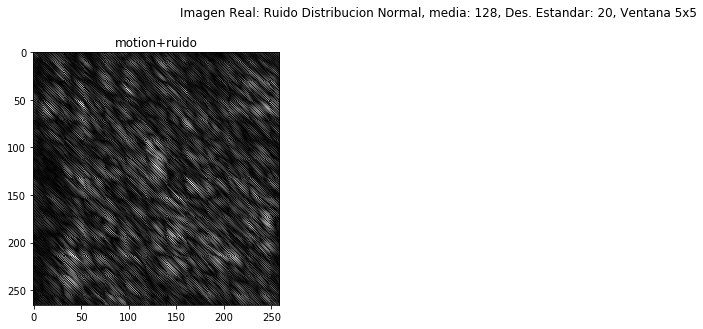

In [201]:
img = cv2.imread('Ej/ex.png',0)
from skimage import color,data,restoration
balance=0.1
h3,f3=blur(img,'motion',10)
h3 +=0.1* h3.std() *np.random.standard_normal(h3.shape)
Rest=restoration.wiener(h3,f3,balance,clip=False)
fu1=np.fft.fftshift(np.fft.fft2(img))
notch_gauss = 1- notch_ideal(img.shape,110)
fu2=np.fft.fftshift(np.fft.fft2(Rest))
filt=fu2*notch_gauss
des=np.fft.ifft2(np.fft.ifftshift(filt))
plt.figure(1,figsize=(15,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('original')
plt.subplot(132), plt.imshow(h3, cmap=plt.cm.gray), plt.title('motion+ruido')
plt.subplot(133), plt.imshow(Rest, cmap=plt.cm.gray), plt.title('restauracion')

plt.figure(2,figsize=(15,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')

plt.subplot(131), plt.imshow(np.log(abs(fu1)), cmap=plt.cm.gray), plt.title('motion+ruido')
plt.subplot(132), plt.imshow(np.log(abs(fu2)), cmap=plt.cm.gray), plt.title('restauracion')
plt.subplot(133), plt.imshow(np.log(abs(filt)), cmap=plt.cm.gray), plt.title('original')

plt.figure(3,figsize=(15,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')

plt.subplot(131), plt.imshow(abs(des), cmap=plt.cm.gray), plt.title('motion+ruido')
#plt.subplot(132), plt.imshow(np.log(abs(fu2)), cmap=plt.cm.gray), plt.title('restauracion')
#plt.subplot(133), plt.imshow(np.log(abs(fu2))*notch_gauss, cmap=plt.cm.gray), plt.title('original')



(<matplotlib.axes._subplots.AxesSubplot at 0x547932e8>,
 <matplotlib.text.Text at 0x58598c18>)

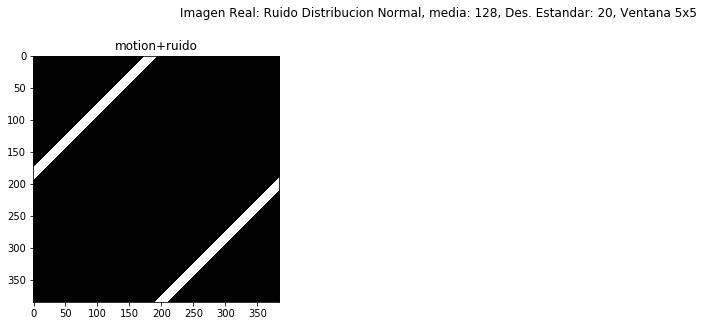

In [194]:
def no(shape, f ,pos, pxd = 1):
    pxd = float(pxd)
    rows, cols = shape
    #rows, cols = 10,10
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    #radius1 = np.sqrt(((x+rows/4)**2)[np.newaxis] + ((y+cols/4)**2)[:,np.newaxis])
    #radius2 = np.sqrt(((x-rows/4)**2)[np.newaxis] + ((y-cols/4)**2)[:,np.newaxis])
    #filt = np.zeros(shape)
    #filt[radius1 <= f] = 1
    #filt[radius2 <= f] = 1
    radius2 = (x+pos)[np.newaxis] +(y) [:,np.newaxis]
    radius3 = (x-pos)[np.newaxis] +(y) [:,np.newaxis]
    #print radius3
    filt = np.zeros(shape)
    filt[radius3 <= f/2] = 1
    filt[radius3 <= -f/2] = 0
    filt[radius2 <= f/2] = 1
    filt[radius2 <= -f/2] = 0
    
    return filt
    
    return filt
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step


def quitarl(img,dist):
    rows, cols = img.shape
    filt = np.ones(img.shape)
    for x in my_range(dist, cols, dist):
        filt=filt*(1-no(img.shape,3,x))
    return filt
    
plt.figure(1,figsize=(15,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')

plt.subplot(131), plt.imshow(no(img.shape,20,200), cmap=plt.cm.gray), plt.title('motion+ruido')
#plt.subplot(132), plt.imshow(np.log(abs(fu2)), cmap=plt.cm.gray), plt.title('restauracion')
#plt.subplot(133), plt.imshow(np.log(abs(fu2))*notch_gauss, cmap=plt.cm.gray), plt.title('original')



C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log


(<matplotlib.axes._subplots.AxesSubplot at 0x55cfa6d8>,
 <matplotlib.text.Text at 0x55444b70>)

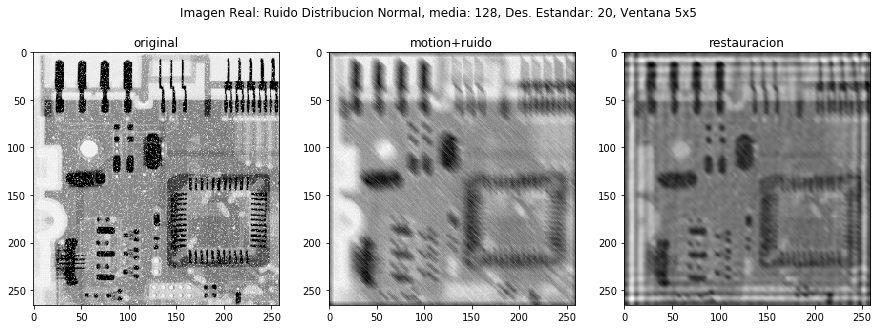

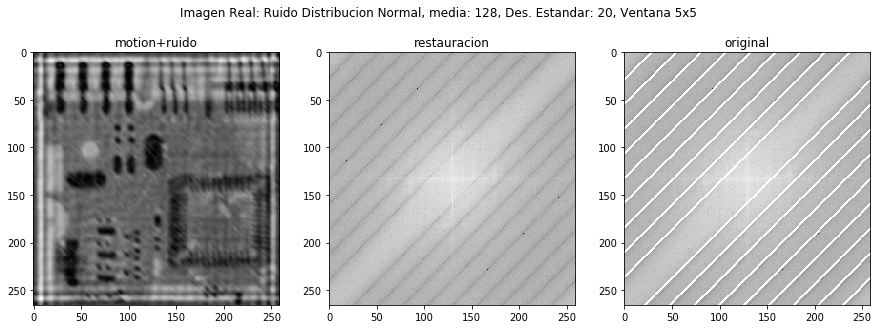

In [203]:

#holl=quitarl(fu2,25.8)
holl=quitarl(fu2,26)
filt1=holl*fu2
#holl1=quitarl(fu2,77)
#filt1=holl1*filt1


des1=np.fft.ifft2(np.fft.ifftshift(filt1))
plt.figure(1,figsize=(15,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('original')
plt.subplot(132), plt.imshow(h3, cmap=plt.cm.gray), plt.title('motion+ruido')
plt.subplot(133), plt.imshow(Rest, cmap=plt.cm.gray), plt.title('restauracion')

plt.figure(2,figsize=(15,5))
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')


plt.subplot(132), plt.imshow(np.log(abs(fu2)), cmap=plt.cm.gray), plt.title('restauracion')
plt.subplot(133), plt.imshow(np.log(abs(filt1)), cmap=plt.cm.gray), plt.title('original')
plt.subplot(131), plt.imshow(abs(des1), cmap=plt.cm.gray), plt.title('motion+ruido')